# **Problem Statement:**

Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

***Do ETL:*** Extract-Transform-Load some Amazon dataset and
1. find for me Sales-trend -> month-wise, year-wise, yearly_month-wise
2. Find key metrics and factors and show the meaningful relationships between
attributes.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('Amazon Sales data.csv')

df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


**Region**-> describes the geogrological location where sales occur

**Country**-> country where sales have made

**Item Type**-> category of saled items

**Sales channel**-> mode of order online/offline

**Order Priority**-> demand of particular product in that area H/M/L/C

**Order date**-> date of placing order

**Order ID**-> unique id for each item

**Ship Date**-> the date when the order placed

**Units Sold**-> Number of shipped items sold

**Unit Price**-> Selling price of item per unit

**Unit Cost**-> Cost price of item per unit

**Total Revenue**-> Total earning

**Total Cost**-> Total cost price of the units of item

**Total Profit**-> Profit

In [51]:
df.shape

(100, 14)

There are total 100 records and 14 features



In [52]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order Date,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0


There is no null value in the data


In [7]:
duplicates = df[df.duplicated()]
num_duplicates = len(duplicates)
num_duplicates

0

There is no duplicate records in given dataset

In [8]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [9]:
#Most sold items
df['Item Type'].value_counts()

,count
Item Type,
Clothes,13
Cosmetics,13
Office Supplies,12
Fruits,10
Personal Care,10
Household,9
Beverages,8
Baby Food,7
Cereal,7


In [10]:
len(df['Item Type'].unique())

12

Total 12 items were saled from 2010 to 2017

In [53]:
len(df['Country'].unique())

76

76 countries are customers

In [54]:
len(df['Region'].unique())

7

All customers covered in 7 Regions


In [58]:
df.loc[df['Total Profit'].idxmax()]

,74
Region,Middle East and North Africa
Country,Pakistan
Item Type,Cosmetics
Sales Channel,Offline
Order Priority,L
Order Date,7/5/2013
Order ID,231145322
Ship Date,8/16/2013
Units Sold,9892
Unit Price,437.2


Amazon earned maximum profit of 1719922.04 $ from Pakistan in July 2013 in category COSMETICS

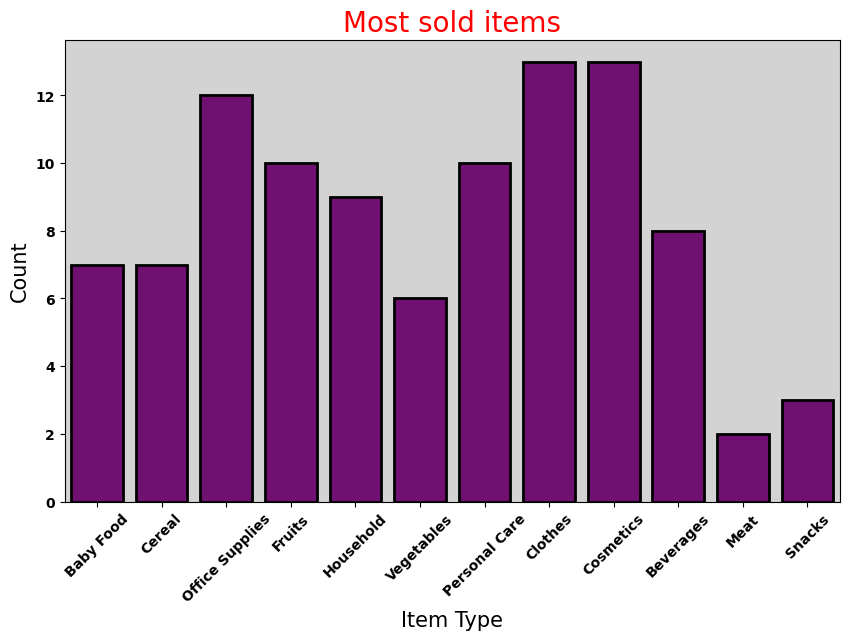

In [14]:
plt.figure(figsize=(10,6))

from matplotlib import rcParams

rcParams['font.weight'] = 'bold'
plt.axes().set_facecolor('lightgray')
sns.countplot(x='Item Type', data=df,color='purple', linewidth=2, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Most sold items', fontsize=20,color='red')
plt.xlabel('Item Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Most sold products are CLOTHES & COSMETICS

Least sold product is MEAT

In [15]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [16]:
#Finding highest profitable month
df.loc[df['Total Profit']== df['Total Profit'].max(),['Order Date','Total Profit','Item Type']]

,Order Date,Total Profit,Item Type
74,2013-07-05,1719922.04,Cosmetics


In [17]:
df.loc[df['Total Profit']== df['Total Profit'].min(),['Order Date','Total Profit','Item Type']]


,Order Date,Total Profit,Item Type
88,2012-04-30,1258.02,Fruits


In [18]:
#Month wise trend
month_wise_trend = df.groupby(df['Order Date'].dt.month)['Total Profit'].sum()
month_wise_trend

,Total Profit
Order Date,
1,2816857.02
2,7072050.51
3,928351.06
4,4760208.35
5,4582692.30
6,2185379.43
7,5578463.06
8,579276.67
9,2344166.03


In [19]:
month_wise_trend.max()

7072050.510000001

In [20]:
month_wise_trend.min()


579276.6699999999

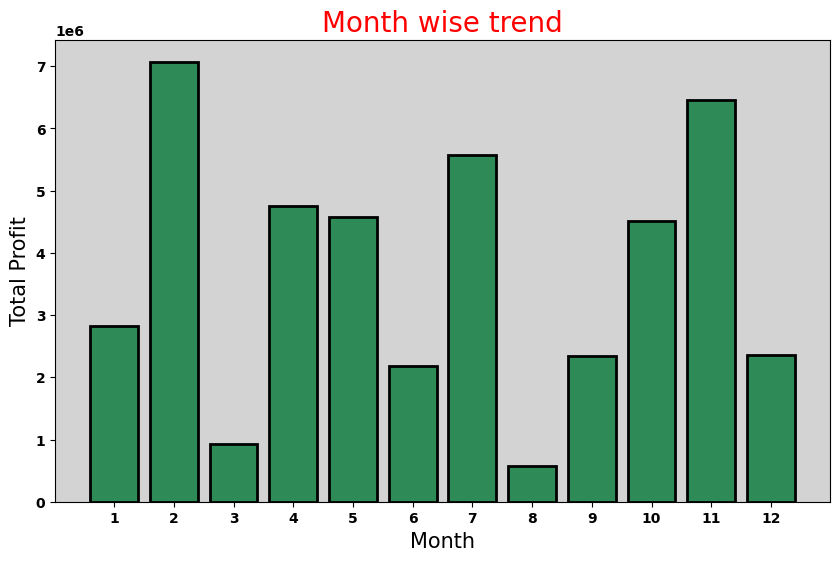

In [21]:
plt.figure(figsize=(10,6))
plt.axes().set_facecolor('lightgray')
plt.bar(month_wise_trend.index,month_wise_trend, color='seagreen',linewidth=2,edgecolor='black')
plt.xlabel('Month',fontsize=15)
plt.xticks(np.arange(1,13))
plt.ylabel('Total Profit',fontsize=15)
plt.title('Month wise trend',fontsize=20,color='red')
plt.show()

Maximum profit in February
then NOV and july is also good

In [22]:
#Year wise trend
year_wise_trend = df.groupby(df['Order Date'].dt.year)['Total Profit'].sum()
year_wise_trend

,Total Profit
Order Date,
2010,6629567.43
2011,2741008.23
2012,9213010.12
2013,6715420.04
2014,5879461.68
2015,3996539.44
2016,4903838.01
2017,4089353.45


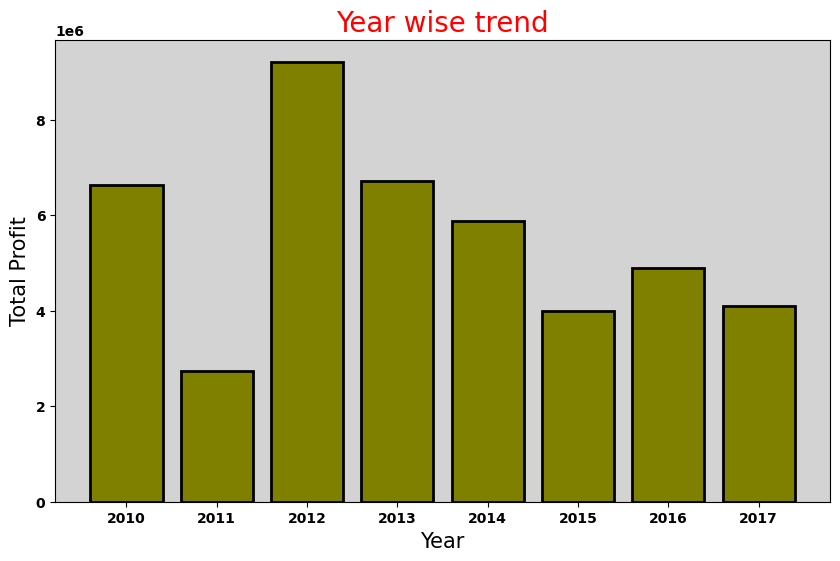

In [23]:
plt.figure(figsize=(10,6))
plt.axes().set_facecolor('lightgray')
plt.bar(year_wise_trend.index,year_wise_trend, color='olive',linewidth=2,edgecolor='black')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Profit',fontsize=15)
plt.title('Year wise trend',fontsize=20,color='red')
plt.show()

Maximum profit in year 2012
minimum in 2011

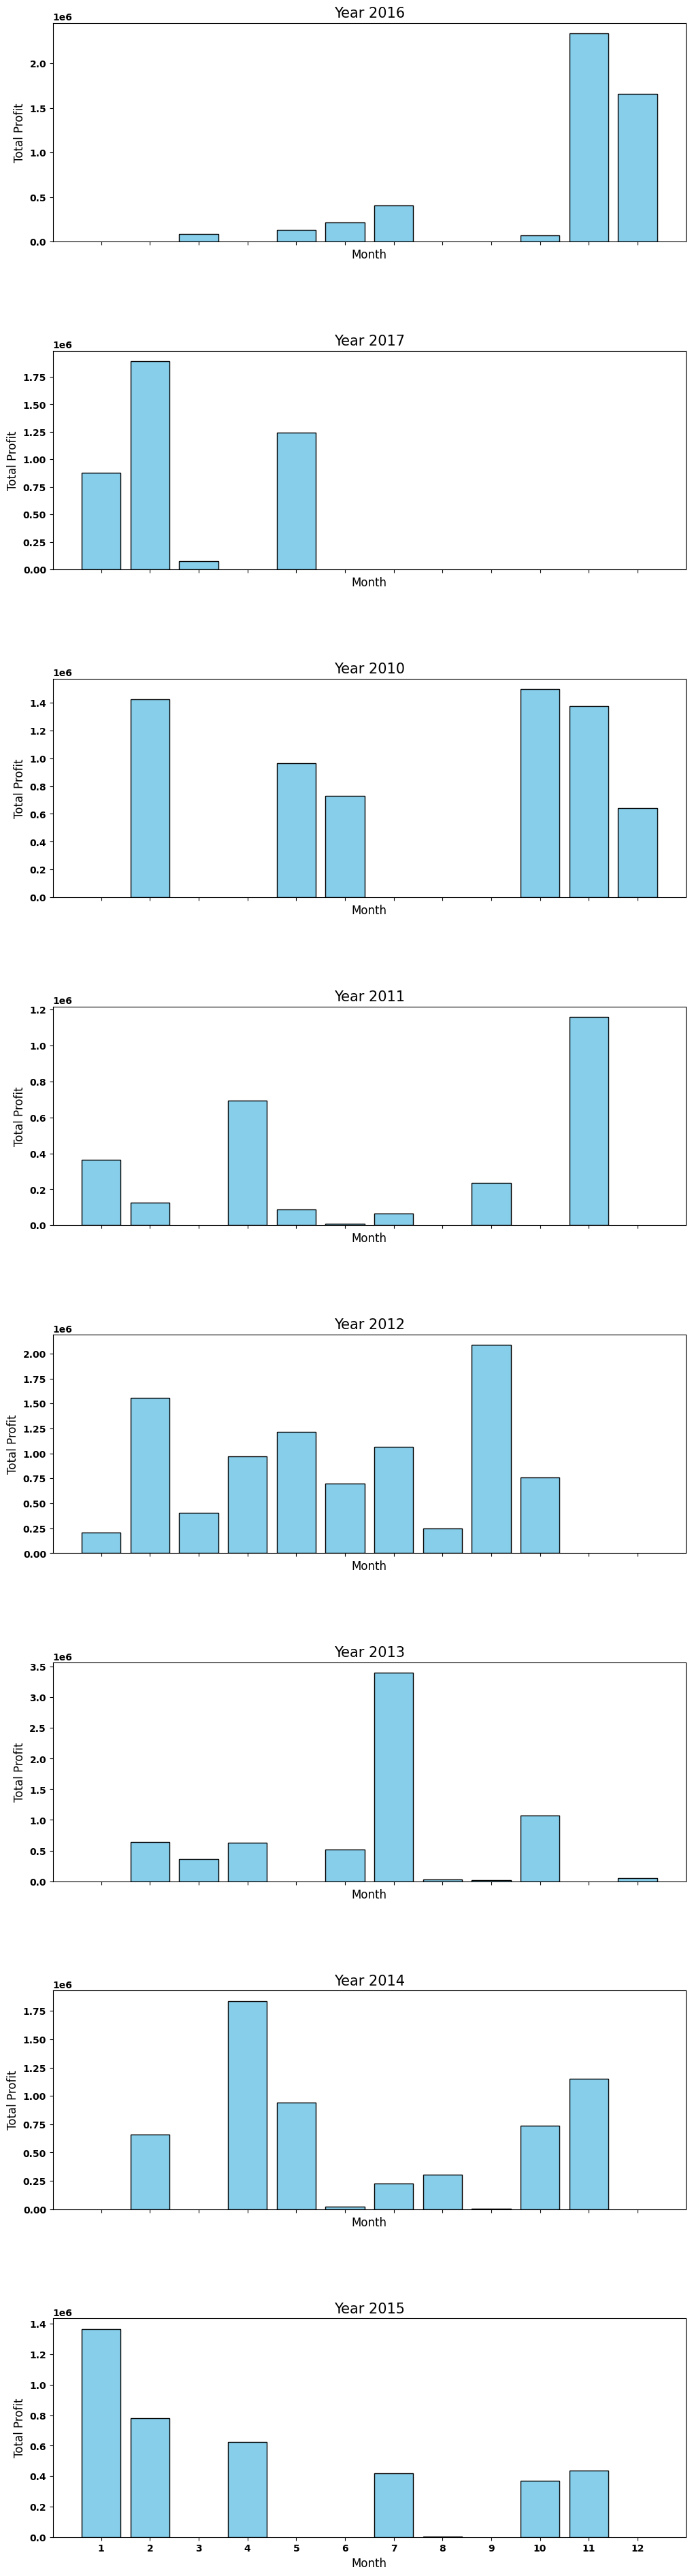

In [24]:

# Year-month wise trend

year_month_wise_trend = df.groupby([df['Order Date'].dt.year, df['Order Date'].dt.month])['Total Profit'].sum()
year_month_wise_trend.head()

# Extract years and months for plotting
years, months = zip(*year_month_wise_trend.index)
years = set(years)

# Plotting
fig, axes = plt.subplots(len(years), 1, figsize=(12, 6 * len(years)), sharex=True)
plt.subplots_adjust(hspace=0.5)

for i, year in enumerate(years):
  year_data = year_month_wise_trend[year]
  axes[i].bar(year_data.index, year_data.values, color='skyblue', edgecolor='black')
  axes[i].set_title(f'Year {year}', fontsize=15)
  axes[i].set_xlabel('Month', fontsize=12)
  axes[i].set_ylabel('Total Profit', fontsize=12)
  axes[i].set_xticks(np.arange(1, 13))

plt.show()


In [25]:
max_profit= year_month_wise_trend.idxmax()
max_profit

(2013, 7)

In [26]:
min_profit = year_month_wise_trend.idxmin()
min_profit

(2015, 8)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item Type       100 non-null    object        
 3   Sales Channel   100 non-null    object        
 4   Order Priority  100 non-null    object        
 5   Order Date      100 non-null    datetime64[ns]
 6   Order ID        100 non-null    int64         
 7   Ship Date       100 non-null    datetime64[ns]
 8   Units Sold      100 non-null    int64         
 9   Unit Price      100 non-null    float64       
 10  Unit Cost       100 non-null    float64       
 11  Total Revenue   100 non-null    float64       
 12  Total Cost      100 non-null    float64       
 13  Total Profit    100 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memor

In [28]:
# Channel wise trend
channel_wise_trend = df.groupby(df['Sales Channel'])['Total Profit'].sum()
channel_wise_trend

,Total Profit
Sales Channel,
Offline,24920726.67
Online,19247471.73


Offline channel has more potential than Online channel

In [29]:
# Country wise channel profits
country_wise_channel_profits = df.groupby(['Country', 'Sales Channel'])['Total Profit'].sum()
country_wise_channel_profits

Country         Sales Channel
Albania         Online           166635.36
Angola          Offline          693911.51
Australia       Offline          207450.12
                Online           369155.00
Austria         Offline          495007.89
                                   ...    
Turkmenistan    Offline          634745.90
                Online           632512.50
Tuvalu          Offline          951410.50
United Kingdom  Online            46735.86
Zambia          Online           225246.90
Name: Total Profit, Length: 87, dtype: float64

In [30]:
country_wise_channel_profits.idxmax()

('Pakistan', 'Offline')

In [31]:
country_wise_channel_profits.idxmin()

('Kuwait', 'Online')

In [32]:


countries_using_both_channels = df.groupby('Country')['Sales Channel'].nunique()
countries_using_both_channels[countries_using_both_channels == 2]


,Sales Channel
Country,
Australia,2
Cameroon,2
Djibouti,2
Honduras,2
Libya,2
Myanmar,2
Norway,2
Sao Tome and Principe,2
Switzerland,2


Total 11 countries are buying items from Amazon through both channels since 2010 to 2017

In [44]:
df['Total Cost'].mean()

931805.6991000001

In [59]:
df['Total Revenue'].mean()

1373487.6831

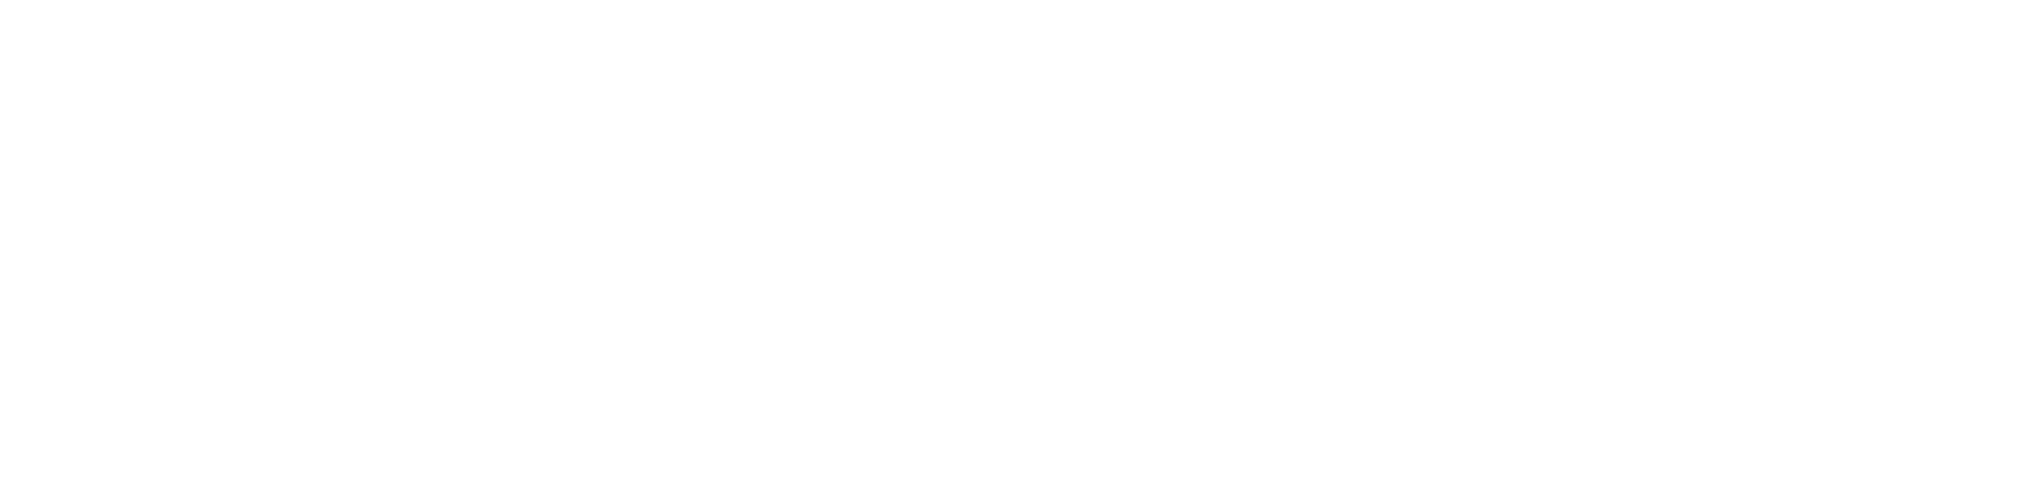